In [2]:
import os 
import sys
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns
import matplotlib.patches as mpatches

from utils import plot_data

In [3]:
path_prefix = '../tmp/benchmark'
names = os.listdir(path_prefix)
data = {}
columns = ['timesteps', 'Eval avg final dist', 'Eval success ratio', 'policy loss']
for name in names:
    path = os.path.join(path_prefix,name)
    dfs = []
    for f in os.listdir(path):
        if f.endswith('.csv'):
            df = pd.read_csv(os.path.join(path, f))[columns]
            df['name'] = name 
            dfs.append(df)
    data[name] = pd.concat(dfs)
names

['claw_base',
 'door_base',
 'door_base_e',
 'door_eE',
 'door_etra',
 'door_netra',
 'door_Tetra',
 'door_Tnetra',
 'empty_base',
 'empty_eE',
 'empty_etra',
 'empty_netra',
 'empty_Tetra',
 'empty_Tnetra',
 'pusher_base',
 'pusher_base_e',
 'pusher_eE',
 'pusher_etra',
 'pusher_netra',
 'pusher_Tetra',
 'pusher_Tnetra',
 'rooms_base',
 'rooms_eE',
 'rooms_etra',
 'rooms_netra',
 'rooms_Tetra',
 'rooms_Tnetra']

In [4]:
door_frames = [df for name, df in data.items() if name in ['door_base', 'door_etra', 'door_netra', 'door_Tetra', 'door_Tnetra', 'door_eE']]
pusher_frames = [df for name, df in data.items() if name in ['pusher_base', 'pusher_etra', 'pusher_netra', 'pusher_Tetra', 'pusher_Tnetra', 'pusher_eE']]
rooms_frames = [df for name, df in data.items() if name in ['rooms_base', 'rooms_etra', 'rooms_netra', 'rooms_Tetra', 'rooms_Tnetra', 'rooms_eE']]
empty_frames = [df for name, df in data.items() if name in ['empty_base', 'empty_etra', 'empty_netra', 'empty_Tetra', 'empty_Tnetra', 'empty_eE']]
claw_frames = [df for name, df in data.items() if name in ['claw_base']]
door_frames = [df for name, df in data.items() if name in ['door_base_e', 'door_eE']]
pusher_frames = [df for name, df in data.items() if name in ['pusher_base_e', 'pusher_eE']]
rooms_frames = [df for name, df in data.items() if name in ['rooms_base', 'rooms_eE']]
empty_frames = [df for name, df in data.items() if name in ['empty_base', 'empty_eE']]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


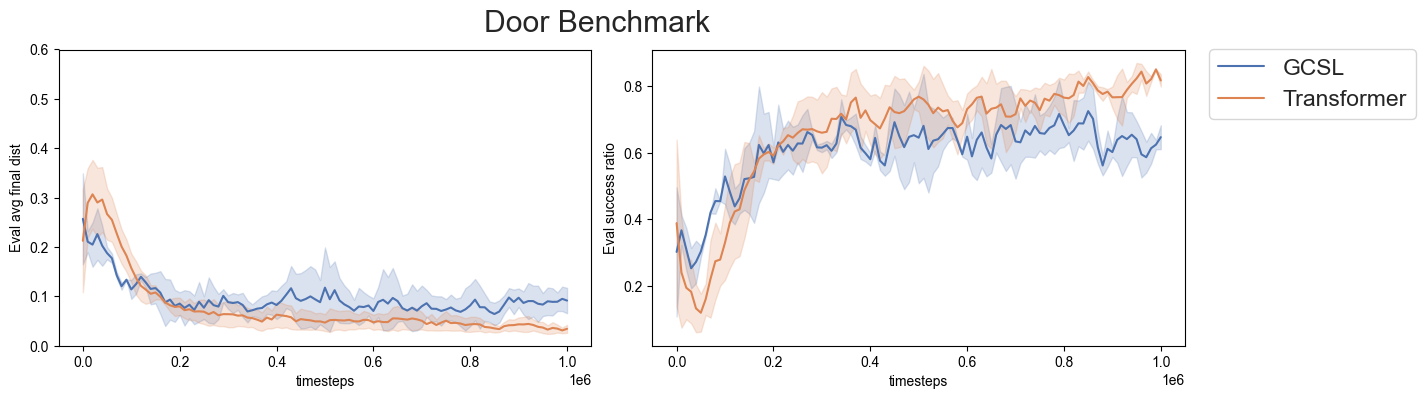

In [5]:
name_mapping_door = {
    'door_base_e': 'GCSL',
    'door_eE': 'Transformer',
}
# change name of list of dataframes 
for df in door_frames:
    df['name'] = df['name'].map(name_mapping_door)

alpha = 0.4
fig, axs = plt.subplots(1, 2, figsize=(12,4))
# ax = sns.lineplot(data=traj_frames_df, x='timesteps', y=columns[2], hue='name', errorbar='sd')
sns.set(font_scale=1)
# plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plot_data(door_frames, xaxis='timesteps', value=columns[1], condition='name', alpha=alpha, ax=axs[0], legend=False)
axs[0].set_ylim(0,0.6)
axs[0].ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plot_data(door_frames, xaxis='timesteps', value=columns[2], condition='name', alpha=alpha, ax=axs[1])
handles, labels = axs[1].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center')
axs[1].get_legend().remove()
# plt.title("Sequence Input", fontsize=25)
sns.move_legend(fig, "upper left", bbox_to_anchor=(1, .91))
# sns.move_legend(
#     ax, "lower center",
#     bbox_to_anchor=(.5, 1), ncol=3, title=None, frameon=False,
# )
fig.suptitle("Door Benchmark")
fig.subplots_adjust(top=0.88)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


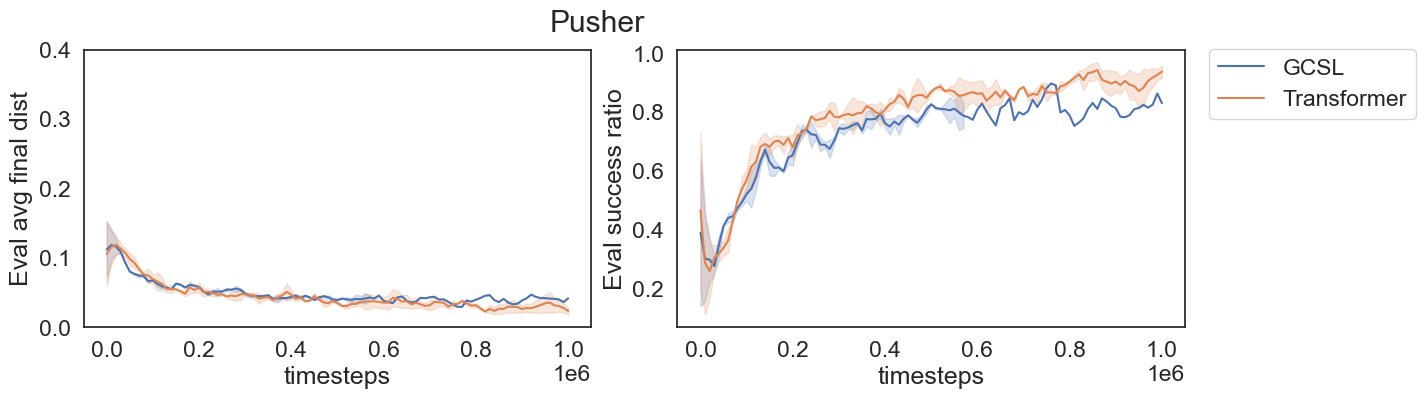

In [7]:
name_mapping_pusher = {
    'pusher_base_e': 'GCSL',
    'pusher_eE': 'Transformer',
}
# change name of list of dataframes
for df in pusher_frames:
    df['name'] = df['name'].map(name_mapping_pusher)


alpha = 0.4
fig, axs = plt.subplots(1, 2, figsize=(12,4))
sns.set(font_scale=1)
plot_data(pusher_frames, xaxis='timesteps', value=columns[1], condition='name', alpha=alpha, ax=axs[0], legend=False)
axs[0].set_ylim(0,0.4)
axs[0].ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plot_data(pusher_frames, xaxis='timesteps', value=columns[2], condition='name', alpha=alpha, ax=axs[1])
handles, labels = axs[1].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center')
axs[1].get_legend().remove()
sns.move_legend(fig, "upper left", bbox_to_anchor=(1, .91))
fig.suptitle("Pusher")
fig.subplots_adjust(top=0.88)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


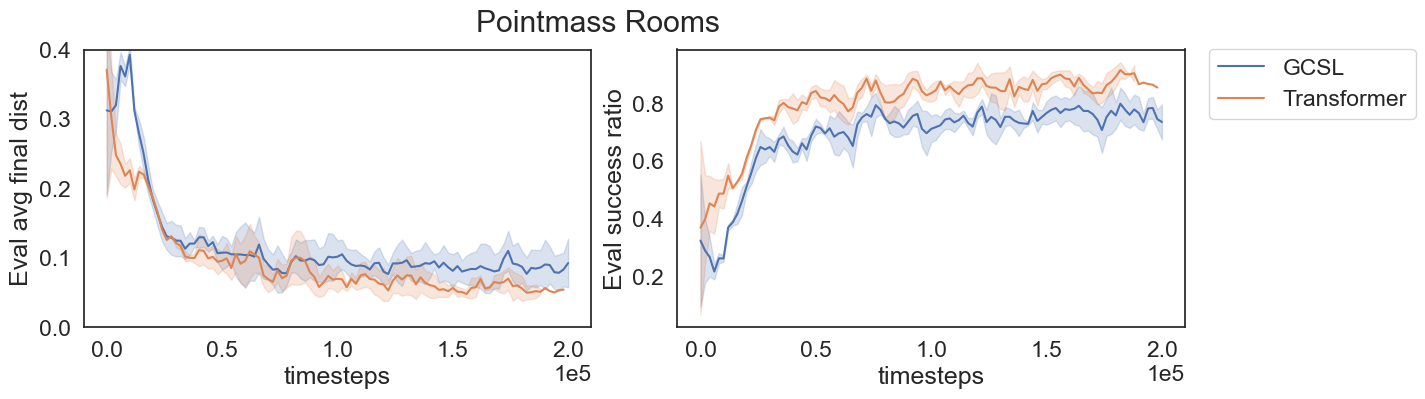

In [8]:
name_mapping_rooms = {
    'rooms_base': 'GCSL',
    'rooms_eE': 'Transformer',
}
# change name of list of dataframes
for df in rooms_frames:
    df['name'] = df['name'].map(name_mapping_rooms)

alpha = 0.4
fig, axs = plt.subplots(1, 2, figsize=(12,4))
sns.set(font_scale=1)
plot_data(rooms_frames, xaxis='timesteps', value=columns[1], condition='name', alpha=alpha, ax=axs[0], legend=False)
axs[0].set_ylim(0,0.4)
axs[0].ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plot_data(rooms_frames, xaxis='timesteps', value=columns[2], condition='name', alpha=alpha, ax=axs[1])
handles, labels = axs[1].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center')
axs[1].get_legend().remove()
sns.move_legend(fig, "upper left", bbox_to_anchor=(1, .91))
fig.suptitle("Pointmass Rooms")
fig.subplots_adjust(top=0.88)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


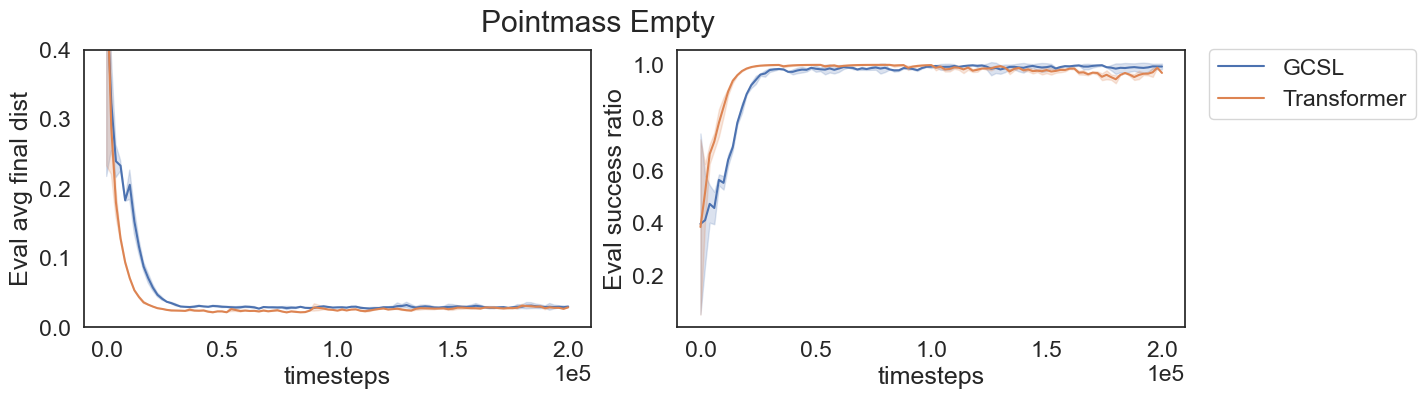

In [9]:
name_mapping_empty = {
    'empty_base': 'GCSL',
    'empty_eE': 'Transformer',
}
# change name of list of dataframes
for df in empty_frames:
    df['name'] = df['name'].map(name_mapping_empty)
    

alpha = 0.4
fig, axs = plt.subplots(1, 2, figsize=(12,4))
sns.set(font_scale=1)
plot_data(empty_frames, xaxis='timesteps', value=columns[1], condition='name', alpha=alpha, ax=axs[0], legend=False)
axs[0].set_ylim(0,0.4)
axs[0].ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plot_data(empty_frames, xaxis='timesteps', value=columns[2], condition='name', alpha=alpha, ax=axs[1])
handles, labels = axs[1].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center')
axs[1].get_legend().remove()
sns.move_legend(fig, "upper left", bbox_to_anchor=(1, .91))
fig.suptitle("Pointmass Empty")
fig.subplots_adjust(top=0.88)

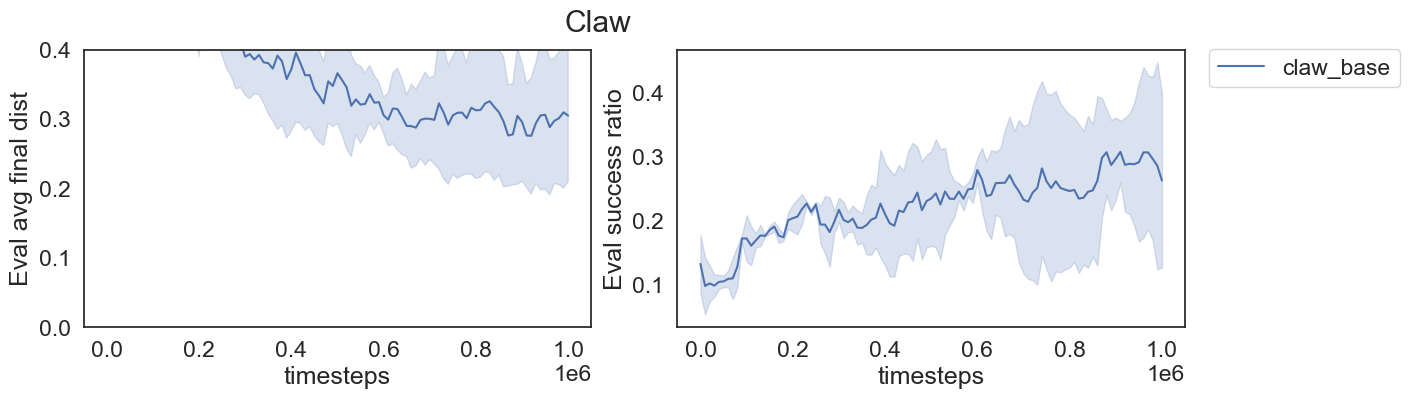

In [8]:
alpha = 0.25
fig, axs = plt.subplots(1, 2, figsize=(12,4))
sns.set(font_scale=1)
plot_data(claw_frames, xaxis='timesteps', value=columns[1], condition='name', alpha=alpha, ax=axs[0], legend=False)
axs[0].set_ylim(0,0.4)
axs[0].ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plot_data(claw_frames, xaxis='timesteps', value=columns[2], condition='name', alpha=alpha, ax=axs[1])
handles, labels = axs[1].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center')
axs[1].get_legend().remove()
sns.move_legend(fig, "upper left", bbox_to_anchor=(1, .91))
fig.suptitle("Claw")
fig.subplots_adjust(top=0.88)

In [ ]:
# Plot 